In [1]:
import numpy as np
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
# tips! easy ways to normalize data
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min()) / (x.max()-x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [16]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

In [15]:
# hash_bucket way
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [17]:
assigned_group

_VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [18]:
#feature engineering Age
import matplotlib.pyplot as plt
%matplotlib inline

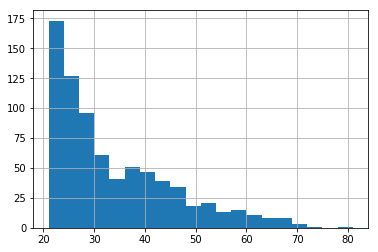

In [19]:
diabetes['Age'].hist(bins=20)

In [20]:
# convert continous value to categorical
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [21]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, pedigree, assigned_group, age_bucket]

In [22]:
# Train Test Split

In [23]:
x_data = diabetes.drop('Class', axis=1)

In [24]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [26]:
#labels
labels = diabetes['Class']

from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [28]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [29]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\Chan\\AppData\\Local\\Temp\\tmp248unjv7', '_task_type': 'worker', '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001A9C7FBF668>, '_is_chief': True, '_service': None, '_task_id': 0, '_num_worker_replicas': 1, '_save_summary_steps': 100}


In [30]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Chan\AppData\Local\Temp\tmp248unjv7\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 98.0078
INFO:tensorflow:loss = 5.06589, step = 101 (1.021 sec)
INFO:tensorflow:global_step/sec: 129.787
INFO:tensorflow:loss = 4.49571, step = 201 (0.771 sec)
INFO:tensorflow:global_step/sec: 122.959
INFO:tensorflow:loss = 6.11116, step = 301 (0.814 sec)
INFO:tensorflow:global_step/sec: 127.372
INFO:tensorflow:loss = 2.99202, step = 401 (0.784 sec)
INFO:tensorflow:global_step/sec: 123.191
INFO:tensorflow:loss = 4.25033, step = 501 (0.813 sec)
INFO:tensorflow:global_step/sec: 106.921
INFO:tensorflow:loss = 5.91783, step = 601 (0.935 sec)
INFO:tensorflow:global_step/sec: 126.464
INFO:tensorflow:loss = 4.53196, step = 701 (0.791 sec)
INFO:tensorflow:global_step/sec: 102.034
INFO:tensorflow:loss = 2.55095, step = 801 (0.985 sec)
INFO:tensorflow:global_step/sec: 108.903
INF

In [31]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [32]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-11-10-04:28:16
INFO:tensorflow:Restoring parameters from C:\Users\Chan\AppData\Local\Temp\tmp248unjv7\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-10-04:28:17
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.735931, accuracy_baseline = 0.649351, auc = 0.80428, auc_precision_recall = 0.64582, average_loss = 0.524697, global_step = 1000, label/mean = 0.350649, loss = 5.05021, prediction/mean = 0.364703


In [33]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80427986,
 'auc_precision_recall': 0.6458205,
 'average_loss': 0.52469677,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0502067,
 'prediction/mean': 0.36470297}

In [34]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1,shuffle=False)

In [35]:
prediction = model.predict(pred_input_func)

In [36]:
my_pred = list(prediction)

INFO:tensorflow:Restoring parameters from C:\Users\Chan\AppData\Local\Temp\tmp248unjv7\model.ckpt-1000


In [37]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.52878147], dtype=float32),
  'logits': array([ 0.11525321], dtype=float32),
  'probabilities': array([ 0.47121856,  0.52878147], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.63680822], dtype=float32),
  'logits': array([ 0.5615375], dtype=float32),
  'probabilities': array([ 0.36319175,  0.63680816], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.34741217], dtype=float32),
  'logits': array([-0.6304338], dtype=float32),
  'probabilities': array([ 0.65258783,  0.34741217], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.34778473], dtype=float32),
  'logits': array([-0.62879092], dtype=float32),
  'probabilities': array([ 0.65221524,  0.34778473], dtype=float

In [38]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\Chan\\AppData\\Local\\Temp\\tmp17pi1ga6', '_task_type': 'worker', '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001A9C8305CC0>, '_is_chief': True, '_service': None, '_task_id': 0, '_num_worker_replicas': 1, '_save_summary_steps': 100}


In [39]:
# convert categorical column to embedded column
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [40]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, pedigree, embedded_group_col, age_bucket]

In [41]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [42]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\Chan\\AppData\\Local\\Temp\\tmp44lcs3k3', '_task_type': 'worker', '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001A9C84830F0>, '_is_chief': True, '_service': None, '_task_id': 0, '_num_worker_replicas': 1, '_save_summary_steps': 100}


In [43]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Chan\AppData\Local\Temp\tmp44lcs3k3\model.ckpt.
INFO:tensorflow:loss = 6.42596, step = 1
INFO:tensorflow:global_step/sec: 124.641
INFO:tensorflow:loss = 4.37594, step = 101 (0.803 sec)
INFO:tensorflow:global_step/sec: 143.361
INFO:tensorflow:loss = 4.81979, step = 201 (0.698 sec)
INFO:tensorflow:global_step/sec: 142.132
INFO:tensorflow:loss = 5.93139, step = 301 (0.704 sec)
INFO:tensorflow:global_step/sec: 144.13
INFO:tensorflow:loss = 3.77959, step = 401 (0.694 sec)
INFO:tensorflow:global_step/sec: 141.147
INFO:tensorflow:loss = 7.81298, step = 501 (0.708 sec)
INFO:tensorflow:global_step/sec: 142.17
INFO:tensorflow:loss = 3.36468, step = 601 (0.703 sec)
INFO:tensorflow:global_step/sec: 137.388
INFO:tensorflow:loss = 4.52928, step = 701 (0.728 sec)
INFO:tensorflow:global_step/sec: 147.776
INFO:tensorflow:loss = 4.46568, step = 801 (0.678 sec)
INFO:tensorflow:global_step/sec: 143.634
INFO:

In [44]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1,shuffle=False)

In [45]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-11-10-05:01:47
INFO:tensorflow:Restoring parameters from C:\Users\Chan\AppData\Local\Temp\tmp44lcs3k3\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-10-05:01:48
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.766234, accuracy_baseline = 0.649351, auc = 0.828766, auc_precision_recall = 0.721527, average_loss = 0.4839, global_step = 1000, label/mean = 0.350649, loss = 4.65754, prediction/mean = 0.365628


{'accuracy': 0.76623374,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82876551,
 'auc_precision_recall': 0.7215271,
 'average_loss': 0.48390037,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.6575408,
 'prediction/mean': 0.36562827}